# 데이터 정제
`-` **그래프그리기 쉽게 변환**
<br>
-----
[순서]
- df 를 stack 과 unstack 으로 여러 변수당 하나의 숫자로 모으기
- df 를 pivot_table 로 변환시키기.
- pivot_table 으로 원하던 시각화진행하기.

`example`

In [2]:
import pandas as pd
df=pd.read_csv("https://raw.githubusercontent.com/guebin/DV2022/master/posts/Simpson.csv",index_col=0,header=[0,1])


In [3]:
df

male      female     
  fail pass   fail pass
A  314  511     19   89
B  208  352      7   18
C  204  121    391  202
D  279  138    244  131
E  137   54    299   94
F  149  224    103  238

`목적` : `심슨의 역설` 검증하기. 
<br>
`-` 주장: 버클리대학에 gender bias가 존재한다. 

- 1973년 가을학기의 입학통계에 따르면 지원하는 남성이 여성보다 훨씬 많이 합격했고, 그 차이가 너무 커서 우연의 일치라 보기 어렵다. 

In [5]:
df1 = df.stack().stack().reset_index()
df1 =df1.rename({'level_0':'department','level_1':'result','level_2':'gender',0:'count'},axis=1)
df1

,department,result,gender,count
0,A,fail,male,314
1,A,fail,female,19
2,A,pass,male,511
3,A,pass,female,89
4,B,fail,male,208
5,B,fail,female,7
6,B,pass,male,352
7,B,pass,female,18
8,C,fail,male,204
9,C,fail,female,391


In [10]:
df1.pivot_table(index='gender',columns='result',values='count',aggfunc=sum)

/tmp/ipykernel_35040/2316897517.py:1: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df1.pivot_table(index='gender',columns='result',values='count',aggfunc=sum)


result,fail,pass
gender,,
female,1063,772
male,1291,1400


In [11]:
df2 = df1.pivot_table(index='gender',columns='result',values='count',aggfunc=sum)

/tmp/ipykernel_35040/359158239.py:1: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df2 = df1.pivot_table(index='gender',columns='result',values='count',aggfunc=sum)


In [15]:
from plotnine import *

In [21]:
df2 = df2.assign(rate = lambda _df2 : _df2['pass']/(_df2['fail']+_df2['pass']))
df2

result,fail,pass,rate
gender,,,
female,1063,772,0.420708
male,1291,1400,0.520253


In [25]:
tidydata = df2.reset_index()

In [26]:
tidydata

result,gender,fail,pass,rate
0,female,1063,772,0.420708
1,male,1291,1400,0.520253


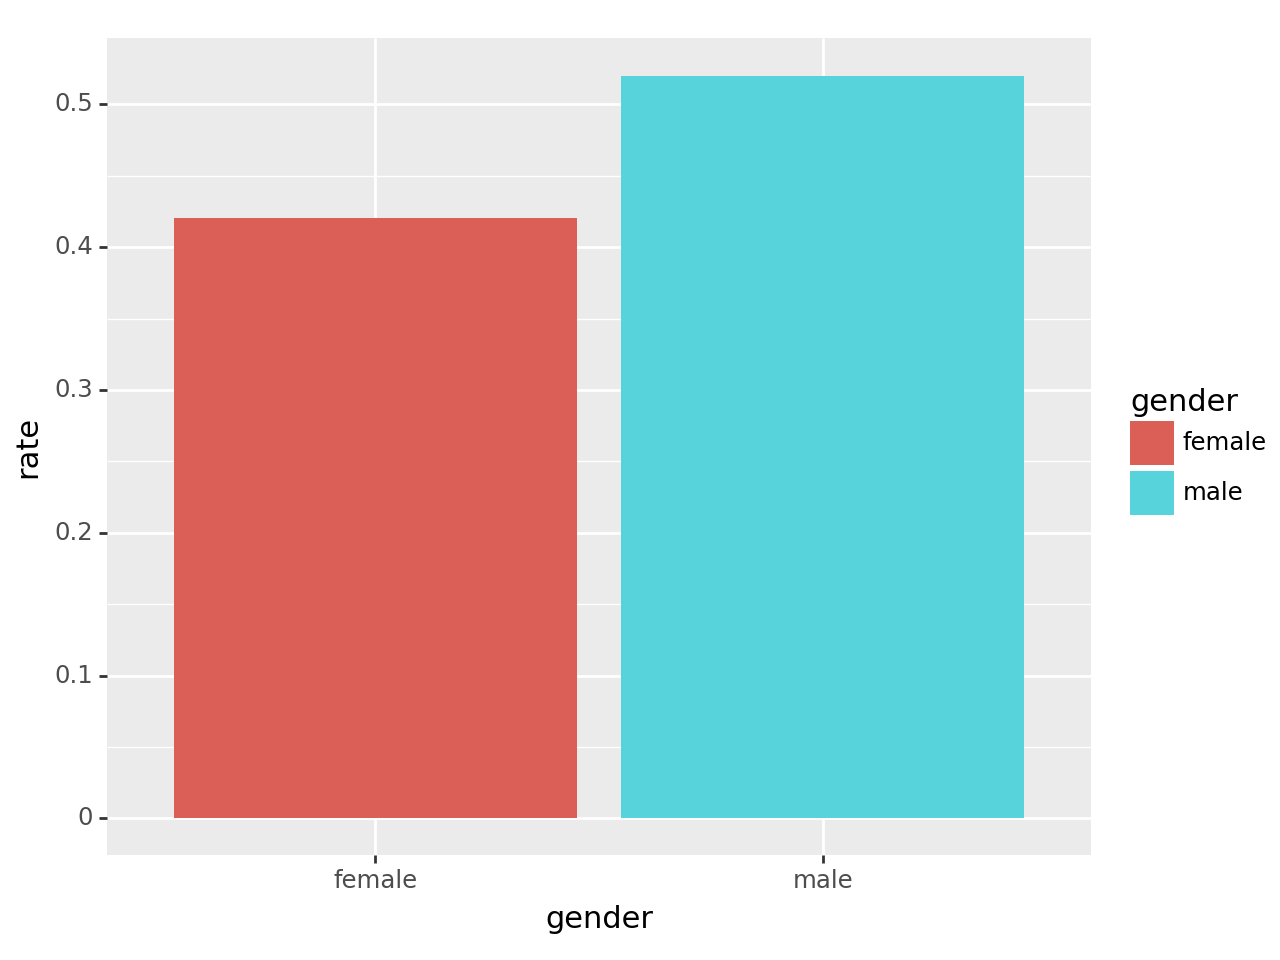

<Figure Size: (640 x 480)>

In [29]:
fig = ggplot(tidydata)
col = geom_col(aes(x='gender',y='rate',fill='gender'))
fig+col